In [1]:
import IPython
import numpy as np
import wave

import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH=""

In [3]:
mix_1_wave = wave.open(PATH+'/content/drive/MyDrive/Data_PRML/signal_1.wav','r')
mix_2_wave = wave.open(PATH+'/content/drive/MyDrive/Data_PRML/signal_2.wav','r')
mix_3_wave = wave.open(PATH+'/content/drive/MyDrive/Data_PRML/signal_3.wav','r')

In [4]:
mix_1_wave.getparams()
mix_2_wave.getparams()
mix_3_wave.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [5]:
# Extract Raw Audio from Wav File
signal_1_raw = mix_1_wave.readframes(-1)
signal_1 = np.fromstring(signal_1_raw, 'int16')

signal_2_raw = mix_2_wave.readframes(-1)
signal_2 = np.fromstring(signal_2_raw, 'int16')

signal_3_raw = mix_3_wave.readframes(-1)
signal_3 = np.fromstring(signal_3_raw, 'int16')

In [6]:
'length: ', len(signal_1) , 'first 100 elements: ',signal_1[:100]

('length: ',
 264515,
 'first 100 elements: ',
 array([-23, -16, -28, -11, -25, -15, -14, -19, -10, -17, -13,  -8, -16,
         -8, -14,  -9,  -9, -14,  -6, -16,  -1, -21,   0, -21,  -5, -13,
        -12, -10, -13, -13, -13, -13, -17, -11, -19, -13, -18, -21, -13,
        -27, -13, -25, -21, -25, -21, -28, -20, -35, -17, -38, -19, -34,
        -25, -30, -23, -32, -24, -29, -25, -19, -28, -15, -27, -14, -20,
        -14, -17,  -9, -15,  -8,  -9, -10,  -1, -11,   3, -13,   7,  -7,
          0,   5,  -8,  10, -10,  15, -12,  16,  -9,   9,   1,   1,   4,
          0,   1,   7,  -2,   6,  -1,   3,   2,   0], dtype=int16))

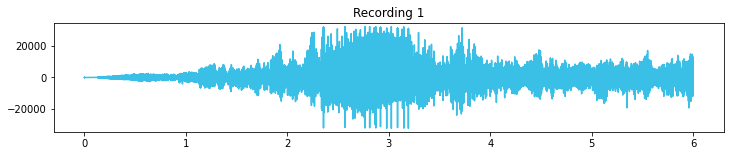

In [7]:
import matplotlib.pyplot as plt

fs = mix_1_wave.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))

plt.figure(figsize=(12,2))
plt.title('Recording 1')
plt.plot(timing,signal_1, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show();

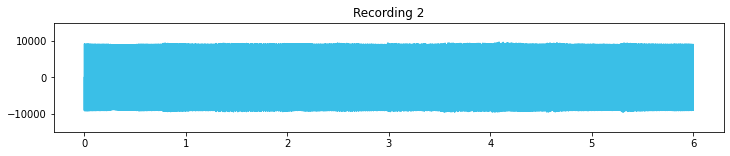

In [8]:

fs = mix_2_wave.getframerate()
timing = np.linspace(0, len(signal_2)/fs, num=len(signal_2))

plt.figure(figsize=(12,2))
plt.title('Recording 2')
plt.plot(timing,signal_2, c="#3ABFE7")
plt.ylim(-15000, 15000)
plt.show();

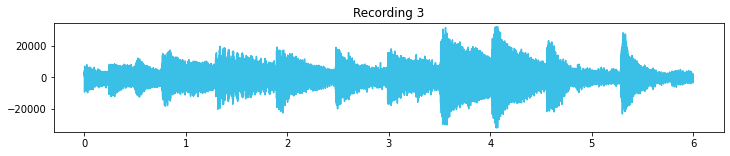

In [9]:

fs = mix_3_wave.getframerate()
timing = np.linspace(0, len(signal_3)/fs, num=len(signal_3))

plt.figure(figsize=(12,2))
plt.title('Recording 3')
plt.plot(timing,signal_3, c="#3ABFE7")
plt.ylim(-35000, 35000)
plt.show();

In [10]:
IPython.display.Audio(PATH+'/content/drive/MyDrive/Data_PRML/signal_1.wav')

In [11]:
IPython.display.Audio(PATH+'/content/drive/MyDrive/Data_PRML/signal_2.wav')

In [12]:
IPython.display.Audio(PATH+'/content/drive/MyDrive/Data_PRML/signal_3.wav')

In [33]:
X = list(zip(signal_1, signal_2,signal_3))

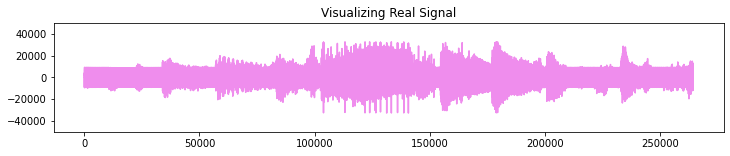

In [34]:
plt.figure(figsize=(12,2))
plt.title('Visualizing Real Signal')
plt.plot(X, c="#ef8ded")
plt.ylim(-50000, 50000)
plt.show()

In [16]:
X=np.array(X)

In [17]:
X.shape

(264515, 2)

In [18]:
X=X.reshape(2,264515)

In [19]:
new_signal_1=signal_1+signal_2

In [20]:
new_signal_2=signal_2+signal_3

In [21]:
mixture=list(zip(new_signal_1, new_signal_2))

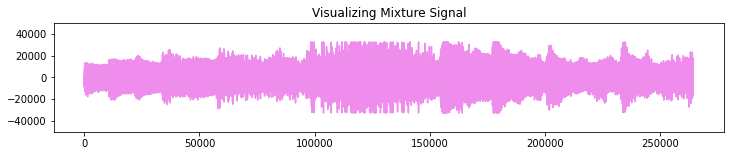

In [22]:
plt.figure(figsize=(12,2))
plt.title('Visualizing Mixture Signal')
plt.plot(mixture, c="#ef8ded")
plt.ylim(-50000, 50000)
plt.show()


#FAST ICA


In [23]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2)
ica_result = ica.fit_transform(mixture)

In [24]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]


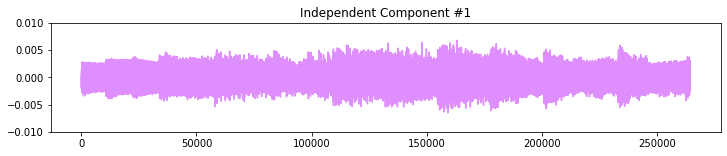

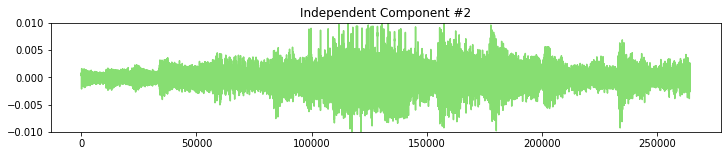

In [25]:
# Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

In [26]:
from scipy.io import wavfile

# Converting to int, mapping the appropriate range, and increasing the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)

# Writing wave files
wavfile.write("result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("result_signal_2.wav", fs, result_signal_2_int)

In [27]:
IPython.display.Audio("result_signal_1.wav")

In [28]:
IPython.display.Audio("result_signal_2.wav")

# ICA

In [28]:
def g(x):
    return np.tanh(x)
def g_der(x):
    return 1 - g(x) * g(x)

In [27]:
class ICA:
  def __init__(self,X,n):
    self.data=X.copy()
    self.iteration=n

  def Centering(self):
    mean=self.data.mean(axis=1,keepdims=True)
    print(mean)
    return self.data-mean

  def Whitening(self):
    cov=np.cov(self.data)
    Eig_val,Eig_vect=np.linalg.eigh(cov)
    D=np.diag(Eig_val)
    D_inv = np.sqrt(np.linalg.inv(D))
    X_whiten = np.dot(Eig_vect, np.dot(D_inv, np.dot(Eig_vect.T, self.data)))
    return X_whiten

  def calculate_A_inv(self,A_inv):
    new_A_inv= (self.data * g(np.dot(A_inv.T, self.data))).mean(axis=1) - g_der(np.dot(A_inv.T, self.data)).mean() * A_inv
    new_A_inv /= np.sqrt((new_A_inv ** 2).sum())
    return new_A_inv

  def fit(self,threshold=1e-5):
    self.data=self.Centering()
    self.data=self.Whitening()
    comp=self.data.shape[0]
    W=np.zeros((comp,comp),dtype=self.data.dtype)
    for i in range(comp):
        w = np.random.rand(comp)
        for j in range(self.iteration):     
            w_new = self.calculate_A_inv(w)
            if i >= 1:
                w_new -= np.dot(np.dot(w_new, W[:i].T), W[:i])
            distance = np.abs(np.abs((w * w_new).sum()) - 1)
            w = w_new
            if distance < threshold:
                break
        W[i, :] = w
    S = np.dot(W, self.data)
    
    return S

In [31]:
mixture=np.array(mixture)
mixture=mixture.reshape(mixture.shape[1],mixture.shape[0])

In [32]:
my_model=ICA(mixture,1000)

In [33]:
S=my_model.fit()

[[-78.23979358]
 [-37.93532314]]


In [31]:
def plot_mixture_sources_predictions(X, original_sources, S):
    fig = plt.figure()
    plt.subplot(3, 1, 1)
    for x in X:
        plt.plot(x)
    plt.title("mixtures")
    plt.subplot(3, 1, 2)
    for s in original_sources:
        plt.plot(s)
    plt.title("real sources")
    plt.subplot(3,1,3)
    for s in S:
        plt.plot(s)
    plt.title("predicted sources")
    
    fig.tight_layout()
    plt.show()

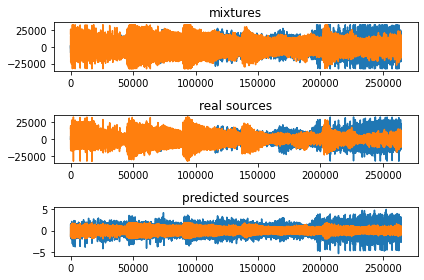

In [35]:
plot_mixture_sources_predictions(mixture,X,S)


# If noise is not considered as noise

In [35]:
X = list(zip(signal_1,signal_2,signal_3))
A = np.array(([[1, 1, 1], [0.5, 2, 1.0], [1, 1, 2]]))
X = np.dot(X, A.T)
X += 0.05 * np.random.normal(size=X.shape)
X = X.T


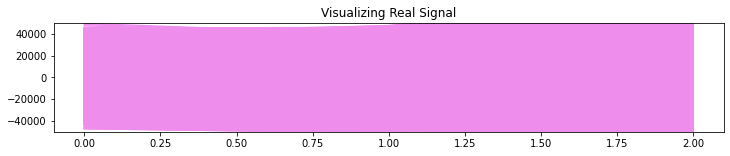

In [36]:
plt.figure(figsize=(12,2))
plt.title('Visualizing Real Signal')
plt.plot(X, c="#ef8ded")
plt.ylim(-50000, 50000)
plt.show()

In [29]:
ica=ICA(X,1000)
S = ica.fit()

[[-37.38733458]
 [-20.1810214 ]
 [-40.36074731]]


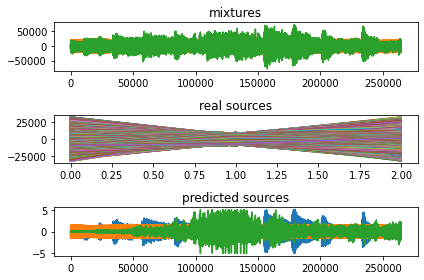

In [32]:
plot_mixture_sources_predictions(X,np.c_[signal_1, signal_2, signal_3],S)

In [15]:
from sklearn.decomposition import FastICA

In [19]:
ica = FastICA(n_components=3)
ica_result = ica.fit_transform(X.T)

In [20]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]


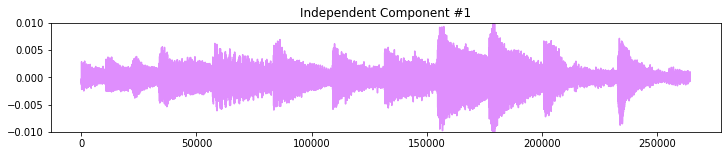

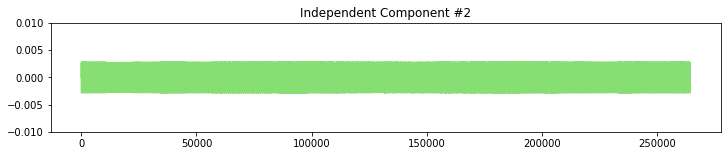

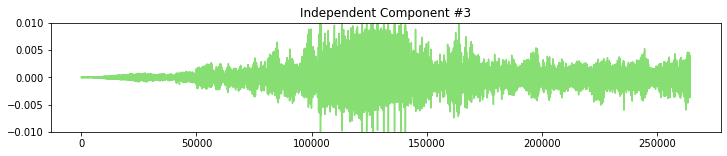

In [21]:
# Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

# Independent Component #3
plt.figure(figsize=(12,2))
plt.title('Independent Component #3')
plt.plot(result_signal_3, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

In [22]:
from scipy.io import wavfile

# Converting to int, mapping the appropriate range, and increasing the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)

# Writing wave files
wavfile.write("result_signal_1.wav", fs, result_signal_1_int)
wavfile.write("result_signal_2.wav", fs, result_signal_2_int)
wavfile.write("result_signal_3.wav", fs, result_signal_3_int)

In [23]:
IPython.display.Audio("result_signal_1.wav")

In [24]:
IPython.display.Audio("result_signal_2.wav")

In [25]:
IPython.display.Audio("result_signal_3.wav")